# **K-Nearest Neighbors Classifier**

## Objectives
* Use K-Nearest neighbors to classify data
* Apply KNN Classifier on a real world data set

---

#### Import Libraries

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## About the Data Set

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such a region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible service categories that correspond to the four customer groups, as follows:

1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

Our objective is to build a classifier to predict the service category for unknown cases. We will use a specific type of classification called K-nearest neighbors.

#### Load Data

In [225]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
data = pd.read_csv(path)

In [226]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


All features have been numerical, and there's no single missing values.

### Data Visualization and Analysis

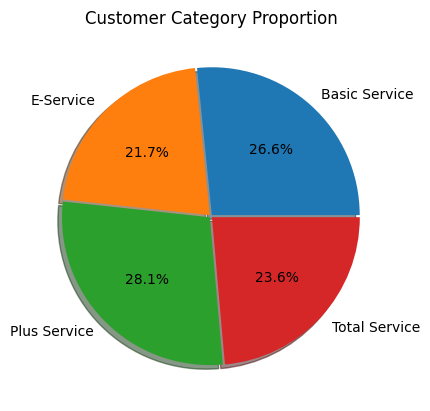

In [228]:
pie = data['custcat'].value_counts().sort_index()
labels = ['Basic Service', 'E-Service', 'Plus Service', 'Total Service']

plt.pie(pie, labels=labels, autopct='%1.1f%%', explode=[0.01] * 4, shadow=True)
plt.title("Customer Category Proportion")
plt.show()

All `custcat` (target) classes are mostly balanced and requires no special means of accounting for classes bias.

We can also visualize the correlation map of the dataset to determine how the different features are related to each other.

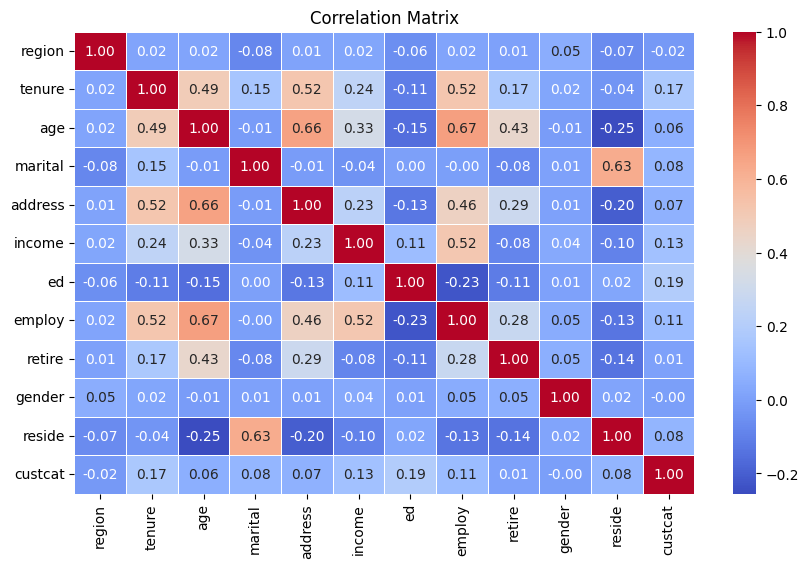

In [229]:
corr = data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

From the correlation map, some features have better correlation among them than others, basically indicating the depth of relationship between the two features. What is of interest to us is the correlation of the target feature, i.e. `custcat` with all the other features. This will help us identify which features should be focussed on for modelling and which ones can be ignored.

The following code snippet will give us list of features sorted in the descending order of their absolute correlation values with respect to the target field.

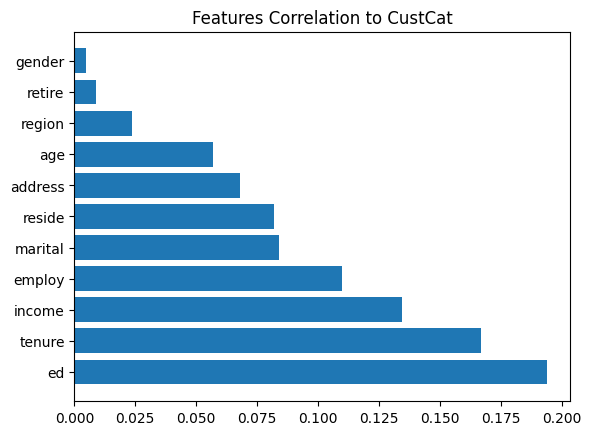

In [230]:
target_corr = corr['custcat'].abs().sort_values(ascending=False).drop('custcat')
plt.barh(target_corr.index, target_corr.values)
plt.title("Features Correlation to CustCat")
plt.show()

This shows us that the features `retire` and `gender` have the least impact on `custcat` while `ed`, `tenure`, and `income` have the most impact.

Let's check data distribution, for this dataset.

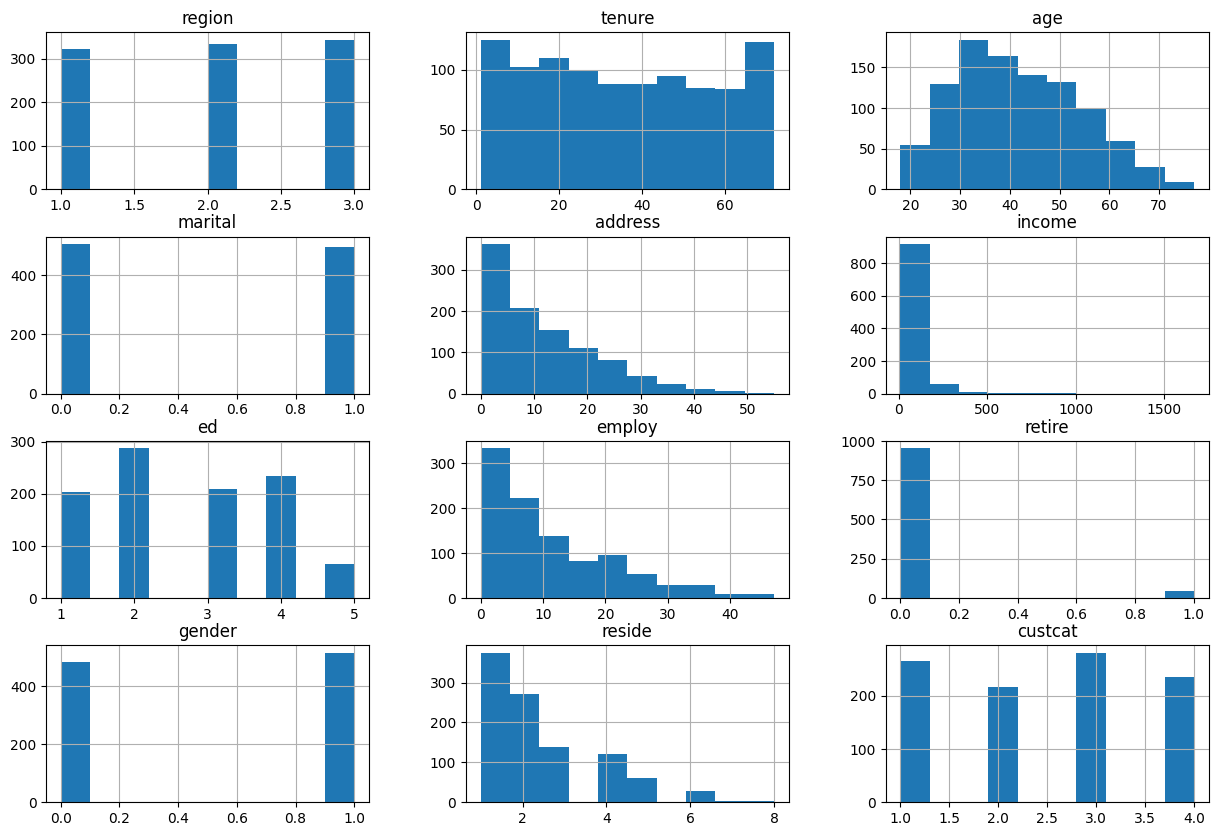

In [231]:
data.hist(figsize=(15, 10))
plt.show()

---

### Preprocessing Data

Standardize or Scale the data is important for KNN model.

KNN makes predictions based on the distance between data points (samples), i.e. for a given test point, the algorithm finds the k-nearest neighbors by measuring the distance between the test point and other data points in the dataset. By Standardizing the data, you ensure that all features contribute equally to the distance calculation. Since normalization scales each feature to have zero mean and unit variance, it puts all features on the same scale (with no feature dominating due to its larger range).

This helps KNN make better decisions based on the actual relationships between features, not just on the magnitude of their values.

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seperate Features and Target
X = data.drop('custcat', axis=1)
y = data['custcat']

# Split the Data into Train and Test Subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)

# Standardize or Scale the features data so they have equal distance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

### KNN CLASSIFICATION

In [233]:
from sklearn.neighbors import KNeighborsClassifier

# Train the model
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predict using the model
knn_pred = knn.predict(X_test_scaled)

#### Accuracy Evaluation

In multilable classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the `jaccard_score` function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test subset.

KNN Accuracy Score: 0.36
Number of Neighbors: 3
--------------------
Detailed Report
              precision    recall  f1-score   support

           1       0.33      0.51      0.40        53
           2       0.37      0.39      0.38        44
           3       0.41      0.30      0.35        56
           4       0.39      0.26      0.31        47

    accuracy                           0.36       200
   macro avg       0.38      0.36      0.36       200
weighted avg       0.38      0.36      0.36       200



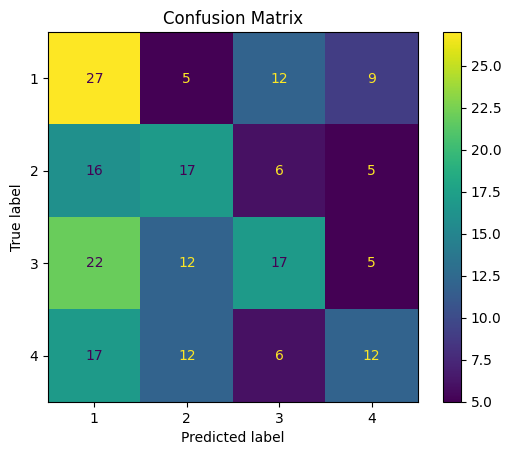

In [234]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

print(f"KNN Accuracy Score: {accuracy_score(y_test, knn_pred):.2f}")
print(f"Number of Neighbors: {k}")
print("-" *20)
print("Detailed Report")
print(classification_report(y_test, knn_pred))

ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, display_labels=knn.classes_)
plt.title("Confusion Matrix")
plt.show()

---

### Choosing the Correct Value of K

K in KNN is the number of nearest neighbors to examine. However, the choice of the value of 'k' clearly affects the model. Therefore, the appropriate choice of the value fo the variable `k` becomes an important task. The general way of doing this is to train the model on a set of different values of k and nothing the performance of the trained model on the testing set. The model with the best value of `accuracy_score` is the one with the ideal value of the parameter k.

Check the performance of the model for 10 values of k, ranging from 1-9. We can evaluate the accuracy along with the standard deviation of the accuracy as well to get a holistic picture of the model performance.

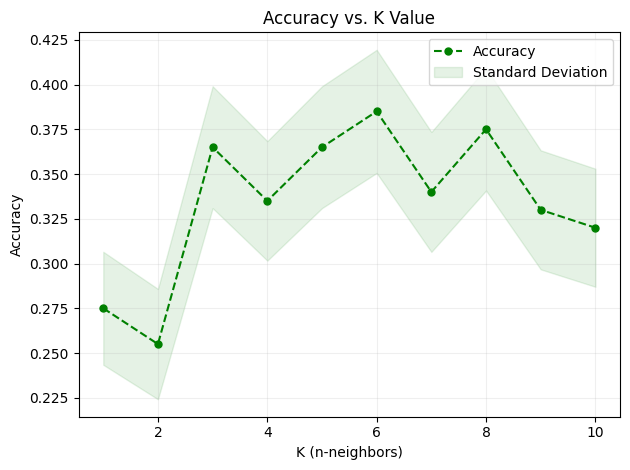

In [235]:
ks = 10
acc = np.zeros(ks)
std_acc = np.zeros(ks)

for n in range(1, ks+1):
    # Train model
    knn_n = KNeighborsClassifier(n_neighbors=n)
    knn_n.fit(X_train_scaled, y_train)

    # Predict
    y_pred = knn_n.predict(X_test_scaled)
    acc[n-1] = accuracy_score(y_test, y_pred)
    std_acc[n-1] = np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

plt.plot(range(1, ks+1), acc, 'g', linestyle='dashed', 
         marker='o', markerfacecolor='green', 
         markersize=5)

plt.fill_between(range(1, ks+1), acc - 1 * std_acc, 
                 acc + 1 * std_acc, alpha=0.10, color='green')

plt.title("Accuracy vs. K Value")
plt.xlabel("K (n-neighbors)")
plt.ylabel("Accuracy")
plt.legend(("Accuracy", "Standard Deviation"))
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [236]:
best_k = acc.argmax() + 1
best_score = acc.max()
print(f"The best K is {best_k} with accuracy {best_score}")

The best K is 6 with accuracy 0.385


---

#### Let's experiment more on K's values

The best K : 23
Accuracy Score: 0.445


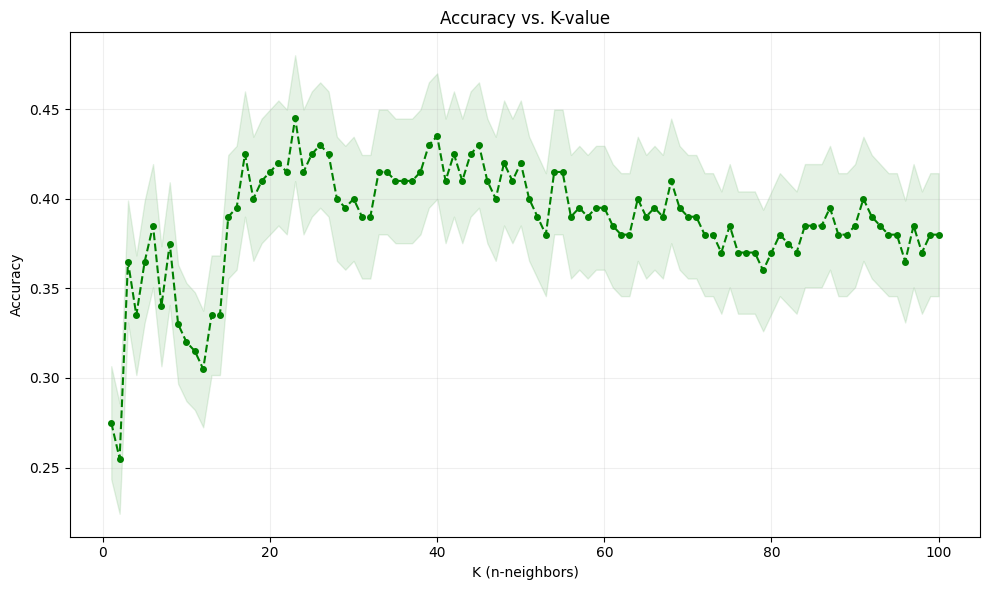

The best K-value is 23 with accuracy 0.445


In [243]:
# k values range 100
ks100 = 100
acc_100 = np.zeros(ks100)
std_acc100 = np.zeros(ks100)

for n in range(1, ks100 + 1):
    # Train    
    knn_n = KNeighborsClassifier(n_neighbors=n)
    knn_n.fit(X_train_scaled, y_train)

    # Predict
    y_pred100 = knn_n.predict(X_test_scaled)

    # Evaluate
    acc_100[n-1] = accuracy_score(y_test, y_pred100)
    std_acc100[n-1] = np.std(y_pred100==y_test)/np.sqrt(y_pred100.shape[0])
best_k100 = acc_100.argmax() + 1
best_acc100 = acc_100.max()


print(f"The best K : {best_k100}")
print(f"Accuracy Score: {best_acc100}")

# Plot ks=100 ranges
plt.figure(figsize=(10,6))
plt.plot(range(1, ks100+1), acc_100, color='g', linestyle='--',
                  marker='o', markersize=4)
plt.fill_between(range(1, ks100+1), acc_100 - 1 * std_acc100, acc_100 + 1 * std_acc100, 
                   color='g', alpha=0.1)
plt.title("Accuracy vs. K-value")
plt.xlabel("K (n-neighbors)")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

print(f"The best K-value is {best_k100} with accuracy {best_acc100}")

The weak performance on the model can be due to multiple reasons: 
1. The KNN model relies entirely on the raw feature space at inference time. If the features do no provide clear boundaries between classes, KNN model cannot compensate through optimization or feature transformation.

2. For a high number of weakly correlated features, the number of dimensions increases, the distance between points tend to become more uniform, reducing the discriminative power of KNN. 

3. The algorithm treats all features equally when computing distances. Hence, weakly correalted features can introduce noise or irrelevant variations in the feature space making it harder for KNN to find meaningful neighbours.

---

#### Let's removes less impactful features

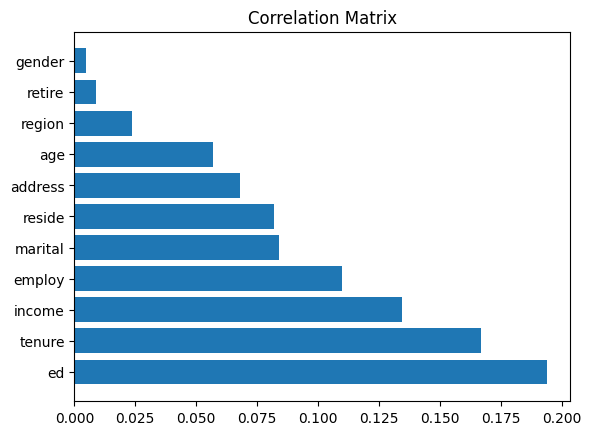

In [238]:
corr = data.corr()['custcat'].abs().sort_values(ascending=False).drop('custcat')

plt.barh(corr.index, corr.values)
plt.title("Correlation Matrix")
plt.show()

From here we can see that the overall features have low correlation with target, however we will try to pick four most related features: `ed`, `tenure`, `income`, `employ`.

In [249]:
# Pick Features
df = data[['ed', 'tenure', 'income', 'employ', 'custcat']].copy()

# Seperate the data
X_clean = df.drop('custcat', axis=1)
y_clean = df['custcat']

# Split into Train and Test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Standardize
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train2)
Xtest_scaled = scaler.transform(X_test2)

# Loop Through every K-values
ks = 100
acc_new = np.zeros(ks)
std_acc_new = np.zeros(ks)

for n in range(1, ks+1):
    # Train the model
    knn_new = KNeighborsClassifier(n_neighbors=n) # Use the best K value we found earlier
    knn_new.fit(Xtrain_scaled, y_train2)

    # Predict
    y_predict = knn_new.predict(Xtest_scaled)

    # Save accuracy and std acc score
    acc_new[n-1] = accuracy_score(y_test2, y_predict)
    std_acc_new[n-1] = np.std(y_test2==y_predict) / np.sqrt(y_predict.shape[0])

best_k = acc_new.argmax() + 1
best_score = acc_new.max()

# 

# Evaluation Report
print(f"Best K-value: {best_k}")
print(f"Accuracy Score: {best_score}")


Best K-value: 48
Accuracy Score: 0.45


Even we picked the most related features, the model still struggle. The most related feature only as 0.19 correlation, the model just not suited for this dataset.

---

#### Let's try Decision Tree instead

In [252]:
from sklearn.tree import DecisionTreeClassifier

# Initialze the Tree
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4)

# Train
dtree.fit(Xtrain_scaled, y_train2)

# Predict
dtree_pred = dtree.predict(Xtest_scaled)

# Evaluate
tree_acc = accuracy_score(y_test2, dtree_pred)

print("\n" + "="*40)
print(f"HEAD-TO-HEAD RESULTS")
print("="*40)
print(f"KNN (Optimized, K=48): {best_score:.4f}")
print(f"Decision Tree (Depth=4): {tree_acc:.4f}")

# Detailed Report
print("\nTree Detailed Report:")
print(classification_report(y_test2, dtree_pred))


HEAD-TO-HEAD RESULTS
KNN (Optimized, K=48): 0.4500
Decision Tree (Depth=4): 0.4000

Tree Detailed Report:
              precision    recall  f1-score   support

           1       0.43      0.43      0.43        53
           2       0.31      0.25      0.28        44
           3       0.42      0.39      0.41        56
           4       0.41      0.51      0.45        47

    accuracy                           0.40       200
   macro avg       0.39      0.40      0.39       200
weighted avg       0.40      0.40      0.40       200



The Tree didn't perform better than KNN, with this i can only assumes that in order to raise the model accuracy, we need another features that more impactfull to the target, or maybe try to engineer the features.